# Verlauf einer Epidemie

Der verlauf von Epidemien lässt sich auch mit Hilfe von Differentialgleichungen beschreiben. Dazu gibt es das sogenannte SIR-Modell. Dieses Modell wird ausführlich in dem Video

[Mehr "Corona-Mathematik": Wie Epidemien modelliert werden beschrieben.](https://www.youtube.com/watch?v=YGeX2Q7D5BU)

Kurz zusammengefasst betrachtet dieses Modell eine Population, die in drei unterschiedliche Gruppen unterteilt wird:

- $S(t)$ ist die Menge an für die Krankheit anfälligen Personen (*susceptible*)
- $I(t)$ ist die Menge an infizierten Personen (*infected*)
- $R(t)$ ist die Menge an genesenen Personen (*recovered*)

Die Änderungsrate der anfälligen Individuen $\dot{S}(t)$ hängt davon ab wie viele Individuen anfällig sind ($S(t)$), wie viele infiziert sind ($I(t)$) und einem Ansteckungsfaktor $\alpha$. Die Änderungsrate an genesenen Individuen hängt davon ab wie viele Individuen derzeit krank sind ($I(t)$) und einem Genesungsfaktor $\beta$, der Auskunft über die mittlere Krankheitsdauer gibt. Die Änderungsrate an infizierten Individuen ($\dot{I}(t)$) entspricht der der Differenz aus den Änderungsraten von anfälligen und genesenen Individuen. Somit wird das SIR-Modell über folgendes Differentialgleichungssystem beschrieben.

$$\dot{S}(t) = -\alpha \cdot S(t) \cdot I(t)$$
$$\dot{I}(t) = \alpha \cdot S(t) \cdot I(t) - \beta \cdot I(t)$$
$$\dot{R}(t) = \beta \cdot I(t)$$

Simulieren Sie eine Epidemie mit $\alpha = 0,0001 \frac{\text{Ansteckungen/Individuum}}{\text{Tag}}$ und einer Genesungsrate $\beta = \frac{1}{14} \frac{1}{\text{Tag}}$. Die Population bestehet zu Beginn der Epidemie aus $S(t = 0) = 10000$ anfälligen und $I(t = 0) = 10$ infizierten Individuen. Berechnen Sie den Zeitverlauf der drei Gruppen $S(t)$, $I(t)$ und $R(t)$, beginnend mit $t = 0$ Tage bis $t = 50$ Tage

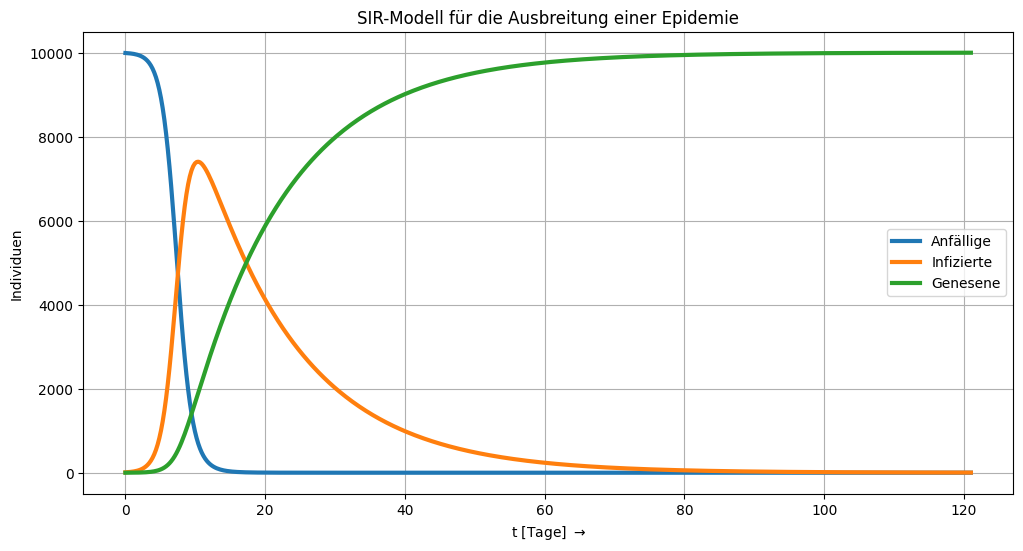

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def xpunkt_sir(t, x, alpha, beta):
    """
    SIR-Modell für Epidemien
    
    Parameter:
    x[0] = S: Anzahl der anfälligen Individuen
    x[1] = I: Anzahl der infizierten Individuen
    x[2] = R: Anzahl der genesenen Individuen
    """
    dxdt = np.zeros(3)
    dxdt[0] = -alpha * x[0] * x[1]           # Änderungsrate der Anfälligen
    dxdt[1] = alpha * x[0] * x[1] - beta * x[1]  # Änderungsrate der Infizierten
    dxdt[2] = beta * x[1]                    # Änderungsrate der Genesenen
    return dxdt

# Parameter
S0 = 10000    # Anfängliche Anzahl anfälliger Individuen
I0 = 10       # Anfängliche Anzahl infizierter Individuen
R0 = 0        # Anfängliche Anzahl genesener Individuen
alpha = 0.0001  # Infektionsrate
beta = 1/14   # Genesungsrate

# Anfangsbedingungen
x0 = [S0, I0, R0]

# Zeitpunkte für die spezifische Auswertung
t_eval = np.array([0, 50, 121])

# Numerische Lösung für kontinuierliche Ausgabe
solution = solve_ivp(
    lambda t, x: xpunkt_sir(t, x, alpha, beta),
    [0, 121],          # Zeitintervall
    x0,                # Anfangsbedingungen
    t_eval=None,       # Kontinuierliche Lösung
    method='RK45',
    rtol=1e-8,
    atol=1e-10,
    dense_output=True
)

# Gleichmäßiges Zeitraster für glatte Kurven
t = np.linspace(0, 121, 500)
x = solution.sol(t)
S = x[0]  # Anfällige
I = x[1]  # Infizierte
R = x[2]  # Genesene

# Grafische Darstellung
plt.figure(figsize=(12, 6))
plt.plot(t, S, label='Anfällige', linewidth=3)
plt.plot(t, I, label='Infizierte', linewidth=3)
plt.plot(t, R, label='Genesene', linewidth=3)
plt.grid(True)
plt.xlabel('t [Tage] $\\rightarrow$')
plt.ylabel('Individuen')
plt.legend()
plt.title('SIR-Modell für die Ausbreitung einer Epidemie')
plt.show()